---
# <font color="#CA3532">Práctica 3 de Neurocomputación</font>
### Curso 2023-2024
### Escuela Politécnica Superior – Universidad Autónoma de Madrid

---

Última actualización: 14-04-2024


---

*Sesión 1*:

- Esta práctica está centrada en [Keras](https://keras.io/)

- Keras es una biblioteca de redes neuronales de código abierto, diseñada para la experimentación con redes neuronales profundas. Keras es modular, extensible y fácil de usar.

- Keras puede usar distintos motores. Aquí se usará con TensorFlow.



In [1]:
### Incluid vuestros nombres, pareja y grupo aquí:
estudiantes = [{'nombre': 'nombre del primer estudiante', 'pareja': 'PXX', 'grupo': 'XXXX'},
               {'nombre': 'nombre del primer estudiante', 'pareja': 'PXX', 'grupo': 'XXXX'}]

### <font color="#CA3532">1. Importación de bibliotecas</font>

TensorFlow 2 incluye oficialmente Keras.

In [2]:
# Importaciones

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

/Users/simoneesposito/My Drive/Uni/UAM/Neuro/NEURO-prac/P3/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### <font color="#CA3532">2. Datos del problema</font>


In [3]:
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
# Details https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.names

dataset = np.loadtxt(dataset_url, delimiter=',')

print(dataset)

### -------------------------------------------------------------------------------
### Dividid los ejemplos en atributos y clases. Guardad el número de atributos.
### -------------------------------------------------------------------------------

x = dataset[:, :-1]
x_size = x.size
y = dataset[:, -1]

[[ 1.24   0.875 -0.205 -0.078  0.067  0.   ]
 [ 0.268  1.352  1.035 -0.332  0.217  0.   ]
 [ 1.567  0.867  1.3    1.041  0.559  0.   ]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671  1.   ]
 [ 0.15   0.933  2.363 -0.742 -0.617  0.   ]
 [ 0.137  0.714  1.35   0.972 -0.63   1.   ]]


In [4]:
# Resultados de la partición y el número de atributos

print(x)
print(y)
print(x_size)

[[ 1.24   0.875 -0.205 -0.078  0.067]
 [ 0.268  1.352  1.035 -0.332  0.217]
 [ 1.567  0.867  1.3    1.041  0.559]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671]
 [ 0.15   0.933  2.363 -0.742 -0.617]
 [ 0.137  0.714  1.35   0.972 -0.63 ]]
[0. 0. 0. ... 1. 0. 1.]
27020


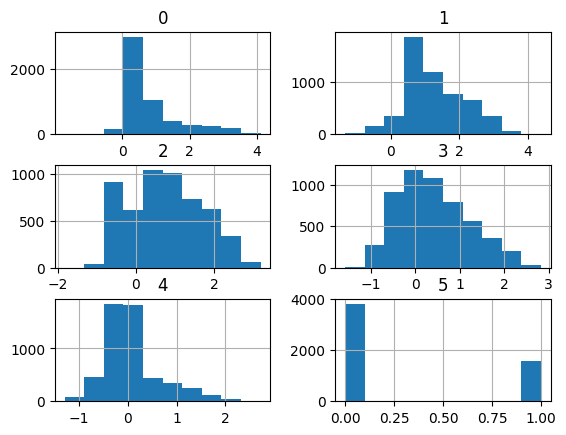

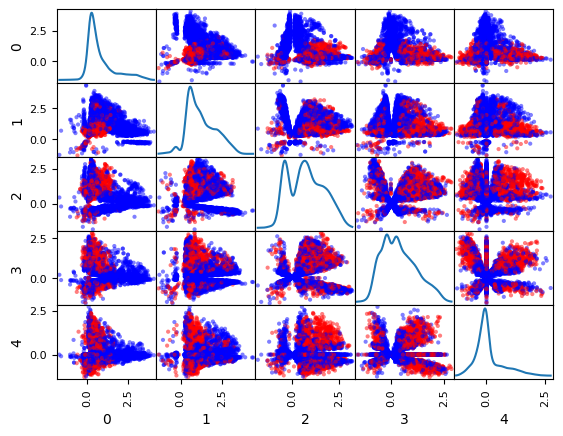

In [5]:
# create pairwise scatter plots of numeric input variables
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# define the dataset location
filename = dataset_url
# load the csv file as a data frame
df = read_csv(filename, header=None)
# histograms of all variables
df.hist()
pyplot.show()
# define a mapping of class values to colors
color_dict = {0:'blue', 1:'red'}
# map each row to a color based on the class value
colors = [color_dict[x] for x in df.values[:, -1]]
# drop the target variable
inputs = DataFrame(df.values[:, :-1])
# pairwise scatter plots of all numerical variables scatter_matrix(inputs, diagonal='kde', color=colors)
scatter_matrix(inputs, diagonal='kde', color=colors)
pyplot.show()

Interpreta las gráficas de arriba:
the histograms show us the distribution of each variable. looking at the range the features might have to be normalize to account for the high differene in values.
the last histogram represents the calss. we can see more than 2/3 of the samples are classifired as 0.
The scatter matrix represents the covariance between each feature pair separated by class.

In [6]:
# Normalizad los datos (si es necesario)

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

¿Qué hace la normalización de datos de arriba?
The normalization makes it so that the values are not too spread out.

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

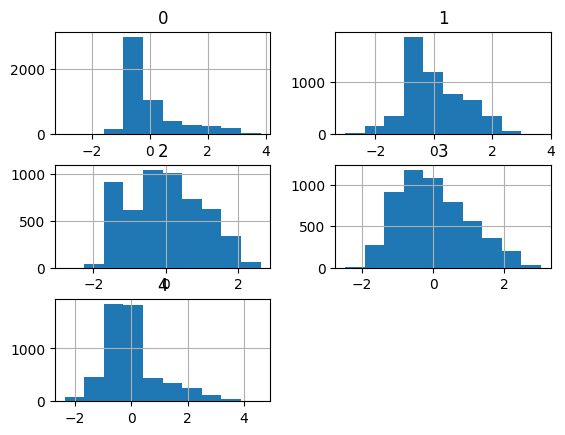

In [7]:
DataFrame(x).hist()

As we can see from the histograms the difference is negligable. Normalization is not needed

### <font color="#CA3532">3. Definición del modelo</font>

- Cada capa del modelo lleva definidas una serie de propiedades (tamaño, función de activación, conectividad, etc.).

- Usaremos el modelo secuencial que Keras para crear una red neuronal multicapa con propagación hacia adelante.



In [8]:
# Definid el modelo con Keras

nn = Sequential()

### -------------------------------------------------------------------------------
### Añadir la capas completamente conectadas que consideréis al modelo
### -------------------------------------------------------------------------------

nn.add(keras.Input(shape=(5,)))
nn.add(Dense(5, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

### <font color="#CA3532">4. Compilación de la red neuronal</font>

- La compilación es la operación que contruye la red neuronal.

- La compilación incluye aspectos que se tendrán en cuenta en el entrenamiento de la red neuronal.

- En la secciones de abajo encontraréis enlaces a la documentación oficial donde podréis encontrar información sobre las distintas estrategias de cada uno de los aspectos.

- También es posible definid vuestras propias funciones.

<font color="#CA3532">Optimizador</font>

El optimizador es la estrategia para calcular las correcciones de los pesos.

https://keras.io/api/optimizers/


<font color="#CA3532"> Función de error (*Loss function*)</font>

La función de error calcula la cantidad que el modelo debe minimizar durante el entrenamiento.

https://keras.io/api/losses/

<font color="#CA3532">Métricas</font>

Una métrica es una función que juzga la actuación del modelo. Son funciones similares a las funciones de error pero, a diferencia de estas, no se aplican durante el entrenamiento, sino sobre los resultados. También pueden usarse las funciones de error como metricas.

https://keras.io/api/metrics/

In [9]:
# Compilación

### -------------------------------------------------------------------------------
### Compilad vuestro modelo de red neuronal
### -------------------------------------------------------------------------------

metrics = [
            #keras.metrics.TruePositives(name='tp'),
            #keras.metrics.FalsePositives(name='fp'),
            #keras.metrics.TrueNegatives(name='tn'),
            #keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='ACC'),
            keras.metrics.Precision(name='P'),
            keras.metrics.Recall(name='R'),
            #keras.metrics.AUC(name='auc'),
            #keras.metrics.AUC(name='PRC', curve='PR'),
          ]

#nn.compile(optimizer='SGD', loss="mse", metrics="accuracy")
nn.compile(optimizer='Adam', loss="binary_crossentropy", metrics=metrics)

### <font color="#CA3532">5. Entrenamiento de la red neuronal</font>

El método "fit" entrena una red neuronal con los datos que se le proporcionen.

Usaremos un 20 % de los datos para validación y un 20 % para test, aunque están permitidas otras maneras de validar, incluso de optimizar de parámetros.

https://keras.io/api/models/model_training_apis/#fit-method

In [10]:
# Entrenamiento

x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=0.4)
x_val, x_test, y_val, y_test = train_test_split(x_rest, y_rest, test_size=0.5)

history = nn.fit(x_train, y_train, epochs=20, verbose=0, validation_data=(x_val, y_val))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

loss, accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Accuracy: %.2f' % (accuracy * 100))
print('Train Precision: %.2f' % (precision * 100))
print('Train Recall: %.2f' % (recall * 100))

loss, accuracy, precision, recall = nn.evaluate(x_val, y_val)
print('Validation Accuracy: %.2f' % (accuracy * 100))
print('Validation Precision: %.2f' % (precision * 100))
print('Validation Recall: %.2f' % (recall * 100))

loss, accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (accuracy * 100))
print('Test Precision: %.2f' % (precision * 100))
print('Test Recall: %.2f' % (recall * 100))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110 (444.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 74 (300.00 B)




102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - ACC: 0.7776 - P: 0.6157 - R: 0.5996 - loss: 0.4225
Train Accuracy: 78.35
Train Precision: 63.83
Train Recall: 61.30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - ACC: 0.7761 - P: 0.5424 - R: 0.5806 - loss: 0.4177
Validation Accuracy: 78.54
Validation Precision: 59.93
Validation Recall: 61.17
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - ACC: 0.7451 - P: 0.5929 - R: 0.5291 - loss: 0.4587
Test Accuracy: 76.41
Test Precision: 63.46
Test Recall: 58.41


### <font color="#CA3532">6. Visualización de resultados del entrenamiento</font>

- El objeto *history* guarda los resultados de cada época.

dict_keys(['ACC', 'P', 'R', 'loss', 'val_ACC', 'val_P', 'val_R', 'val_loss'])


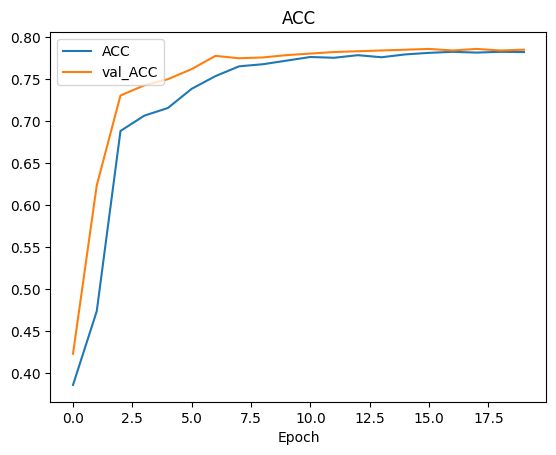

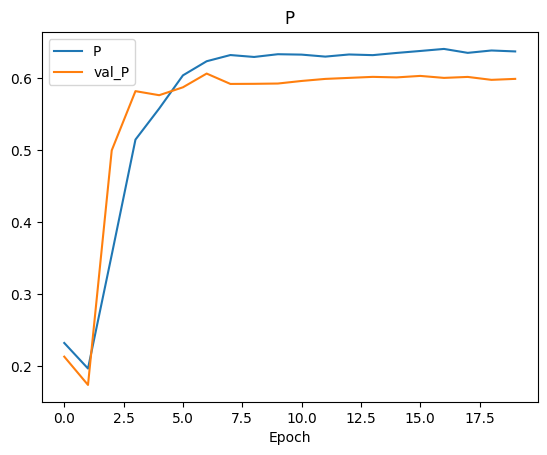

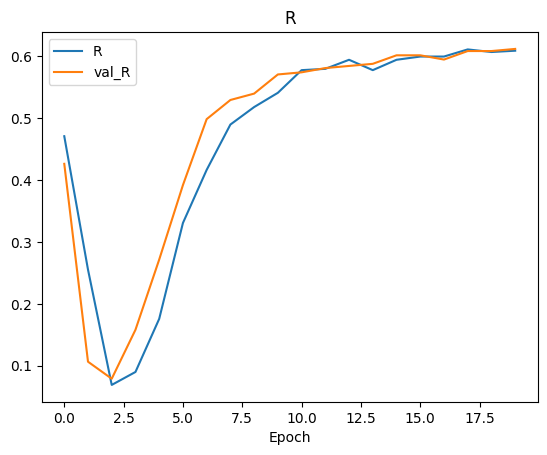

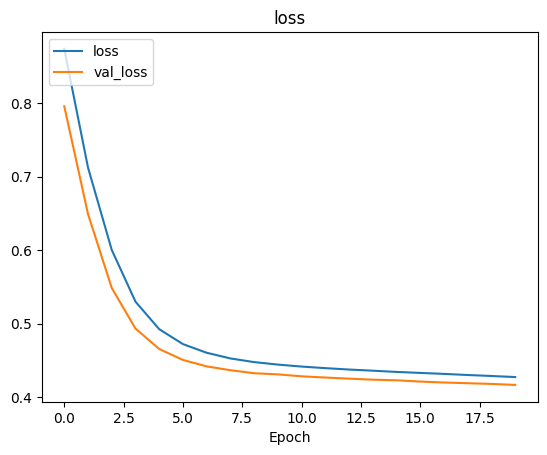

In [11]:
# Visualizar los resultados del entrenamiento

print(history.history.keys())

for key in [key for key in history.history.keys() if "val_" not in key]:
  plt.plot(history.history[key], label=key)
  plt.plot(history.history['val_' + key], label='val_' + key)
  plt.title(key)
  plt.ylabel('')
  plt.xlabel('Epoch')
  plt.legend(loc="upper left")
  plt.show()


In [12]:
### -------------------------------------------------------------------------------
### Explicad lo que se observa con distintas configuraciones:
### -------------------------------------------------------------------------------

### Usando un número pequeño de neuronas en el capa oculta (~= neuronas de la capa de entrada)
# Accuracy ~70% en test
# Precision y recall ~50% en test

### Usando un número grande de neuroras en la capa oculta (>> neuronas de la capa de entrada)
# Accuracy ~80% en test
# Precision ~70% en test
# Recall ~60% en test


Cambiad la arquitectura de la red neuronal introduciendo más capas y neuronas para conseguir mejores resultados:
- Añadir más capas o diferente tipo de capas.
- Cambiad las funciones de activación.
- Cambiad la función de error o el optimizador.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110 (444.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 74 (300.00 B)




102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - ACC: 0.7985 - P: 0.6703 - R: 0.6821 - loss: 0.4351
Train Accuracy: 80.20
Train Precision: 66.53
Train Recall: 68.18
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - ACC: 0.7649 - P: 0.5693 - R: 0.6139 - loss: 0.4479
Validation Accuracy: 76.13
Validation Precision: 57.36
Validation Recall: 61.11
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - ACC: 0.7775 - P: 0.6379 - R: 0.6006 - loss: 0.4426
Test Accuracy: 78.35
Test Precision: 62.54
Test Recall: 60.52
dict_keys(['ACC', 'P', 'R', 'loss', 'val_ACC', 'val_P', 'val_R', 'val_loss'])


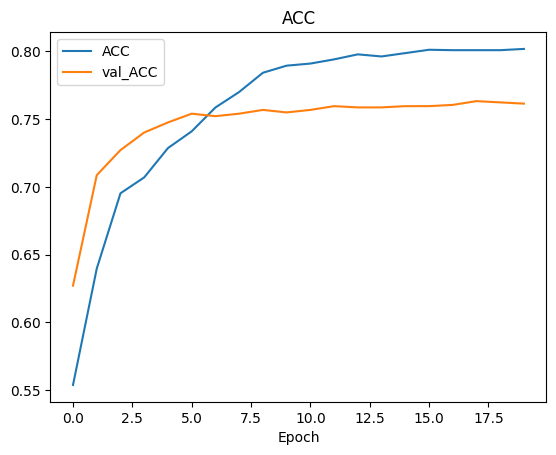

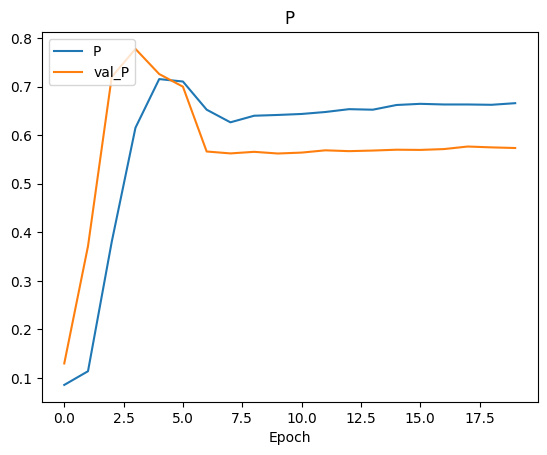

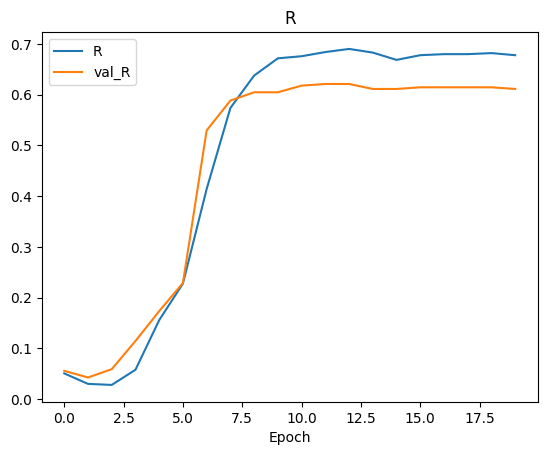

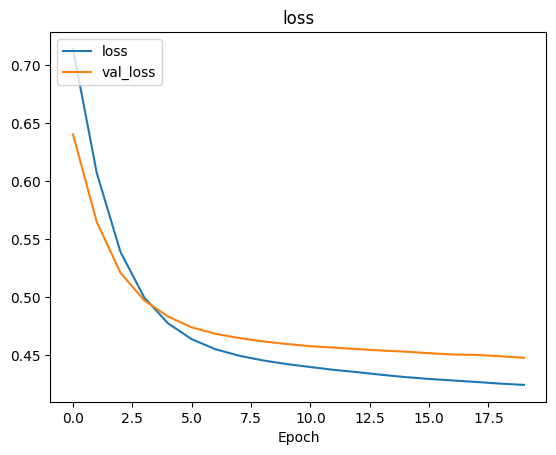

In [13]:
# Define el modelo con Keras

nn = Sequential()

### -------------------------------------------------------------------------------
### Incluid vuestro código aquí
###-------------------------------------------------------------------------------

nn.add(keras.Input(shape=(5,)))
nn.add(Dense(5, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

# Compilación
metrics = [
            keras.metrics.BinaryAccuracy(name='ACC'),
            keras.metrics.Precision(name='P'),
            keras.metrics.Recall(name='R'),
          ]

#nn.compile(optimizer='SGD', loss="mse", metrics="accuracy")
nn.compile(optimizer='Adam', loss="binary_crossentropy", metrics=metrics)

# Entrenamiento
x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=0.4)
x_val, x_test, y_val, y_test = train_test_split(x_rest, y_rest, test_size=0.5)

history = nn.fit(x_train, y_train, epochs=20, verbose=0, validation_data=(x_val, y_val))

# Detalles de la red

nn.summary()
print('\n\n')

loss, accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Accuracy: %.2f' % (accuracy * 100))
print('Train Precision: %.2f' % (precision * 100))
print('Train Recall: %.2f' % (recall * 100))

loss, accuracy, precision, recall = nn.evaluate(x_val, y_val)
print('Validation Accuracy: %.2f' % (accuracy * 100))
print('Validation Precision: %.2f' % (precision * 100))
print('Validation Recall: %.2f' % (recall * 100))

loss, accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (accuracy * 100))
print('Test Precision: %.2f' % (precision * 100))
print('Test Recall: %.2f' % (recall * 100))

# Visualización resultados

print(history.history.keys())

for key in [key for key in history.history.keys() if "val_" not in key]:
  plt.plot(history.history[key], label=key)
  plt.plot(history.history['val_' + key], label='val_' + key)
  plt.title(key)
  plt.ylabel('')
  plt.xlabel('Epoch')
  plt.legend(loc="upper left")
  plt.show()
  
# Evaluación


## <font color="#CA3532">7. Optimización del diseño de la red neuronal</font>

Utiliza RandomSearch para la búsqueda de los valores de los hiperparámetros del modelo que mejoren los resultados. Consulta su funcionamiento en https://keras.io/keras_tuner/ y https://keras.io/api/keras_tuner/tuners/random/. Experimenta con tuner, estudia y comenta los resultados.

In [14]:
!pip3 install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.7 MB/s eta 0:00:00


In [89]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    nn = Sequential()
    # test results have shown that number of units above 64 give similar results (around 80% accuracy)
    # test results have shown that the default activation function 'relu' is by far the best
    nn.add(keras.Input(shape=(5,)))
    nn.add(Dense(64, activation='relu'))
    nn.add(Dense(1, hp.Choice('activation', values=['sigmoid', 'relu'])))
    # nn.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
    # test results have shown that the default learning rate of 0.01 is the best
    nn.compile(loss = hp.Choice('loss', values=['binary_crossentropy', 'mse']), optimizer=keras.optimizers.Adam(0.01), metrics=['accuracy'])
    # test results have shown that sigmoid and binary_crossentropy or relu and mse are the best combinations
    return nn

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=6, executions_per_trial=3)
tuner.search_space_summary()

tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val), verbose=0)

Search space summary
Default search space size: 2
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
loss (Choice)
{'default': 'binary_crossentropy', 'conditions': [], 'values': ['binary_crossentropy', 'mse'], 'ordered': False}


In [90]:
best_nn = tuner.get_best_models(num_models=1)

In [91]:
print(tuner.results_summary())

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
activation: sigmoid
loss: binary_crossentropy
Score: 0.8226950367291769

Trial 0 summary
Hyperparameters:
activation: relu
loss: mse
Score: 0.8208449085553488

Trial 2 summary
Hyperparameters:
activation: sigmoid
loss: mse
Score: 0.8171446124712626

Trial 3 summary
Hyperparameters:
activation: relu
loss: binary_crossentropy
Score: 0.7730496525764465
None


## <font color="#CA3532">8. Técnicas para problemas desbalanceados</font>


Usaremos algunas técnicas para preparar los datos para ajustar un modelo:
- Técnicas de muestreo
  - Técnicas de submuestreo
  - Técnicas de sobremuestreo
- Técnicas de aprendizaje con costes

In [23]:
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 9.4 MB/s eta 0:00:00


### <font color="#CA3532">8.1 Técnica de submuestreo</font>

Estudia como utilizar [RandomUnderSample](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) de Imbalance-Learn para confeccionar un conjunto de datos (a partir del original) que contenga en mismo número de ejemplos de la clase mayoritaria que el número de ejemplos en la clase minoritaria. Construye un modelo con estos datos y estudia y comenta los resultados.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(sorted(Counter(y).items()))

rus = RandomUnderSampler(sampling_strategy='auto', random_state=None, replacement=False)
x_resampled, y_resampled = rus.fit_resample(x, y)

print(sorted(Counter(y_resampled).items()))

[(0.0, 3818), (1.0, 1586)]
[(0.0, 1586), (1.0, 1586)]


In [ ]:
history = nn.fit(x_train, y_train, epochs=20, verbose=0, validation_data=(x_val, y_val))

y_pred = nn.predict(x_test)
y_pred = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

### <font color="#CA3532">8.2 Técnica de sobremuestreo</font>

Estudia como utilizar RandomOverSample de Imbalance-Learn para confeccionar un conjunto de datos (a partir del original) que contenga en mismo número de ejemplos de la clase minoritaria que el número de ejemplos en la clase mayoritaria. Construye un modelo con estos datos y estudia y comenta los resultados.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print(sorted(Counter(y).items()))

sampling_strategy = 1.0
ros = RandomOverSampler(sampling_strategy='auto', random_state=None)
x_resampled, y_resampled = ros.fit_resample(x, y)

print(sorted(Counter(y_resampled).items()))

In [ ]:
history = nn.fit(x_train, y_train, epochs=20, verbose=0, validation_data=(x_val, y_val))

y_pred = nn.predict(x_test)
y_pred = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

### <font color="#CA3532">8.3 Técnica de apredizaje con costes</font>

Estudia como utilizar el parámetro [class_weight de fit](https://keras.io/api/models/model_training_apis/) en keras para asignar un peso distinto a cada clase del problema de manera que se tenga en cuenta durante el aprendizaje. Construye un modelo que use class_weight con los datos originales. Comenta los experimentos y los resultados.

In [ ]:
weights = {0:1, 1:100} # ajustad estos pesos de alguna manera razonable
history = nn.fit(x_train, y_train, epochs=20, verbose=0, class_weight=weights, validation_data=(x_val, y_val))

y_pred = nn.predict(x_test)
y_pred = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

## <font color="#CA3532">9. Conclusiones generales</font>

Resume el trabajo hecho en esta práctica y las conclusiones que hayas sacado.